# Exercises

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

In [1]:
# standard imports
# ignore warnings
import os
from env import get_connection
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

# possible modules, may just wrangle like before
import wrangle
import summarize

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.shape

(35446, 41)

In [4]:
df.head()

,id,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,propertylandusedesc
3,2288172,12177905,NaN,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",...,"145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,NaN,Central,Single Family Residential
4,781532,12095076,1.00,3.00,4.00,9.00,3.00,"2,962.00","2,962.00","6,037.00",...,"773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",-0.00,2017-01-01,Central,Central,Single Family Residential
6,1246926,12790562,NaN,3.00,4.00,9.00,3.00,"3,039.00","3,039.00","6,037.00",...,"220,583.00","2,016.00","43,056.00","3,104.19","60,375,002,024,006.00",-0.04,2017-01-02,NaN,Central,Single Family Residential
7,1639362,11104527,1.00,3.00,4.00,8.00,3.00,"2,540.00","2,540.00","6,037.00",...,"430,108.00","2,016.00","158,393.00","6,103.36","60,379,200,341,014.00",0.01,2017-01-02,Central,Central,Single Family Residential
8,249412,13944538,13.00,2.50,3.00,NaN,2.50,"1,340.00","1,340.00","6,059.00",...,"319,668.00","2,016.00","223,051.00","4,078.08","60,590,888,014,006.00",0.05,2017-01-02,Yes,NaN,Single Family Residential


In [5]:
df.columns.to_list()

['id',
 'parcelid',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror',
 'transactiondate',
 'airconditioningdesc',
 'heatingorsystemdesc',
 'propertylandusedesc']

In [6]:
# Create a dictionary to map FIPS codes to county names
fips_to_county = {
    6037: 'Los Angeles County',
    6059: 'Orange County',
    6111: 'Ventura County',
}

# Add a new 'County' column based on the FIPS codes
df['County'] = df['fips'].map(fips_to_county)

In [7]:
# county  coluymn in df
df.columns[-1:]

Index(['County'], dtype='object')

In [8]:
df.isna().sum()

id                                  0
parcelid                            0
airconditioningtypeid           21913
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid            2590
calculatedbathnbr                   1
calculatedfinishedsquarefeet        0
finishedsquarefeet12                3
fips                                0
fullbathcnt                         1
garagecarcnt                    32962
garagetotalsqft                 32962
heatingorsystemtypeid            1918
latitude                            0
longitude                           0
lotsizesquarefeet                 252
poolcnt                         27516
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc               2544
rawcensustractandblock              0
regionidcity                      469
regionidcounty                      0
regionidneighborhood            19094
regionidzip                         0
roomcnt     

# 1. Is there a relationship between logerror and the property's location (e.g., county or city)? You can use visualizations like box plots or bar charts to compare logerror across different locations.

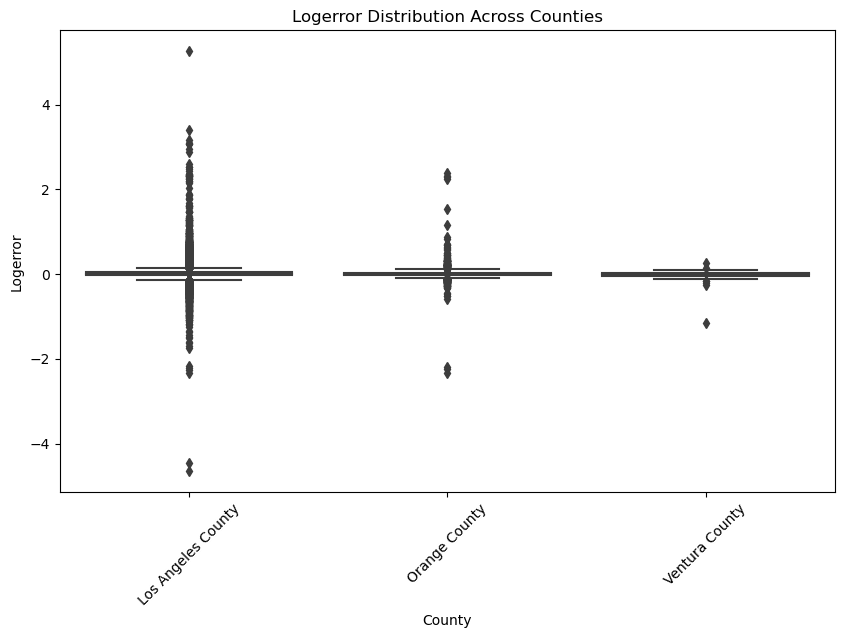

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='County', y='logerror', data=df)
plt.title('Logerror Distribution Across Counties')
plt.xticks(rotation=45)
plt.xlabel('County')
plt.ylabel('Logerror')
plt.show()

In [10]:
from scipy.stats import f_oneway

counties = df['County'].unique()
county_groups = [df[df['County'] == county]['logerror'] for county in counties]

f_statistic, p_value = f_oneway(*county_groups)
if p_value < 0.05:
    print("There is a significant difference in logerror among counties.")
else:
    print("There is no significant difference in logerror among counties.")

There is no significant difference in logerror among counties.


# 2. How does logerror vary with property size (e.g., square footage)? You can create scatter plots to visualize this relationship.

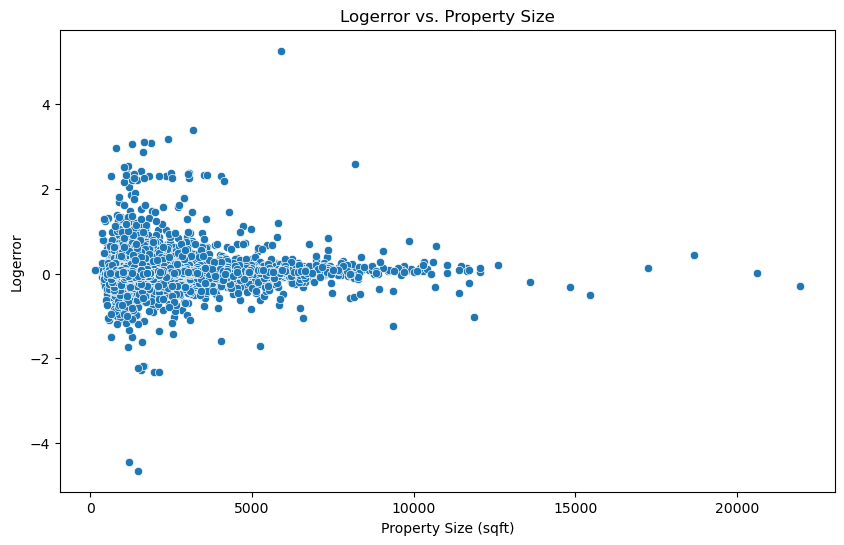

In [11]:
# Example 2: Scatter plot to visualize logerror vs. property size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=df)
plt.title('Logerror vs. Property Size')
plt.xlabel('Property Size (sqft)')
plt.ylabel('Logerror')
plt.show()

In [12]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['calculatedfinishedsquarefeet'], df['logerror'])

if p_value < 0.05:
    print(f"There is a significant correlation between logerror and property size (r = {correlation}).")
else:
    print("There is no significant correlation between logerror and property size.")


There is a significant correlation between logerror and property size (r = 0.033566290661693275).


# 3. Is there a correlation between logerror and property age? You can calculate the correlation coefficient and plot a scatter plot to explore this.

In [13]:
# transactiondate'and yearbuilt columns are in datetime format
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# Calculate property age in years by subtracting yearbuilt from the year of transactiondate
df['property_age_years'] = df['transactiondate'].dt.year - df['yearbuilt']

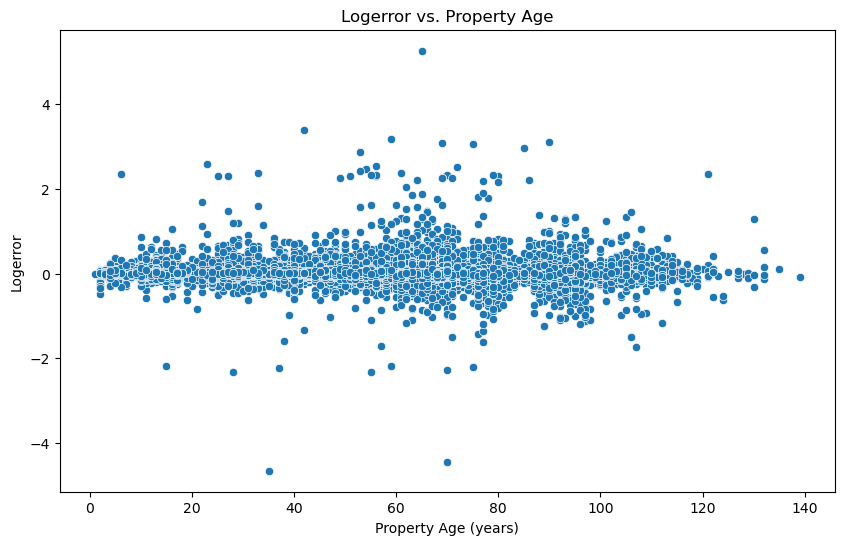

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='property_age_years', y='logerror', data=df)
plt.title('Logerror vs. Property Age')
plt.xlabel('Property Age (years)')
plt.ylabel('Logerror')
plt.show()

In [16]:
df['property_age_years'] = df['property_age_years'].fillna(0)

In [17]:
correlation, p_value = pearsonr(df['property_age_years'], df['logerror'])

if p_value < 0.05:
    print(f"There is a significant correlation between logerror and property age (r = {correlation}).")
else:
    print("There is no significant correlation between logerror and property age.")

There is a significant correlation between logerror and property age (r = -0.02148903789945629).


# 4. Does logerror vary with the time of year (e.g., seasonality)? You can group the data by month and visualize logerror trends over time.

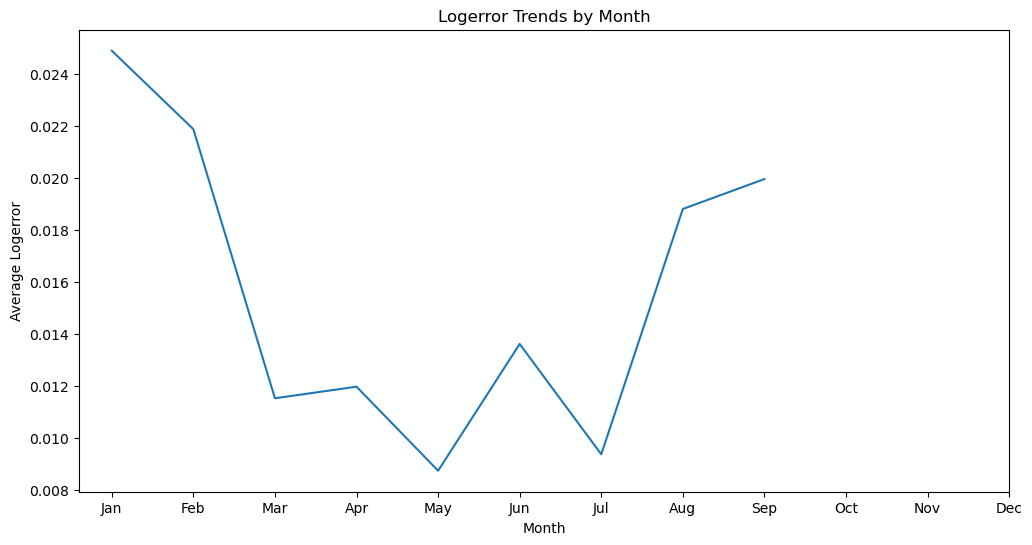

In [18]:
plt.figure(figsize=(12, 6))
df['transactiondate'] = pd.to_datetime(df['transactiondate'])  # Assuming there's a date column
df['month'] = df['transactiondate'].dt.month
monthly_logerror = df.groupby('month')['logerror'].mean().reset_index()
sns.lineplot(x='month', y='logerror', data=monthly_logerror)
plt.title('Logerror Trends by Month')
plt.xlabel('Month')
plt.ylabel('Average Logerror')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [19]:
from scipy.stats import kruskal

months = df['month'].unique()
month_groups = [df[df['month'] == month]['logerror'] for month in months]

statistic, p_value = kruskal(*month_groups)
if p_value < 0.05:
    print("There is a significant difference in logerror among months.")
else:
    print("There is no significant difference in logerror among months.")


There is a significant difference in logerror among months.


# 5. Is there a difference in logerror for different properties with different numbers of bedrooms

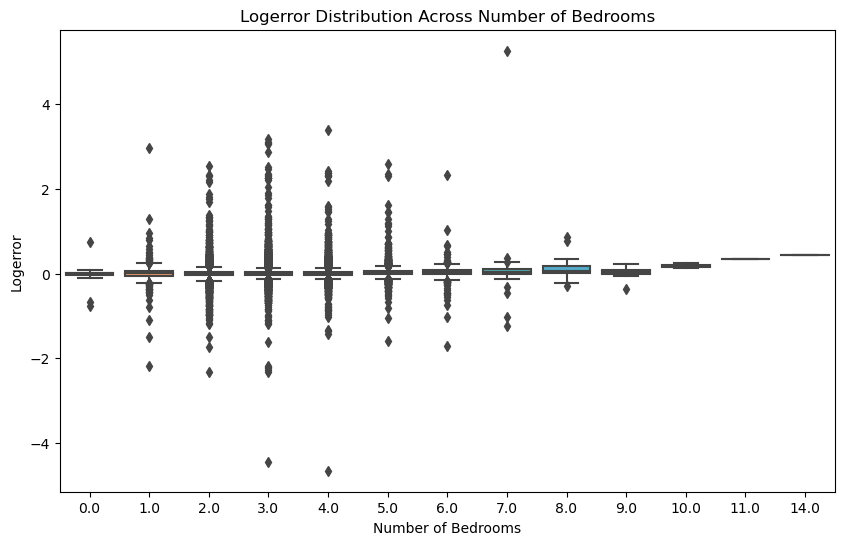

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedroomcnt', y='logerror', data=df)
plt.title('Logerror Distribution Across Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Logerror')
plt.show()

In [21]:
bedroom_counts = df['bedroomcnt'].unique()
bedroom_groups = [df[df['bedroomcnt'] == count]['logerror'] for count in bedroom_counts]

f_statistic, p_value = f_oneway(*bedroom_groups)
if p_value < 0.05:
    print("There is a significant difference in logerror among different numbers of bedrooms.")
else:
    print("There is no significant difference in logerror among different numbers of bedrooms.")


There is a significant difference in logerror among different numbers of bedrooms.


# Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.